??? danger Vous êtes professeur ? Obtenez des informations en cliquant ici.  
  
Ce notebook est conçu pour être utilisé avec des ressources (diaporama, fiche d'exercice et vidéo).

Retrouvez les dans l'espace professeur du site [mathadata.fr](https://mathadata.fr/fr).

Pour tout retour, coquille, demande d'aide, critique, ou félicitation, contactez-nous sur [question-notebook@mathadata.fr](mailto:question-notebook@mathadata.fr).

???


# MathAData - Module Statistiques - 1


# Classification des images de 2 et de 7


!!! abstract But du TP  
Dans ce Notebook, nous allons construire un algorithme qui prédit si un 2 ou un 7 est écrit sur une image.
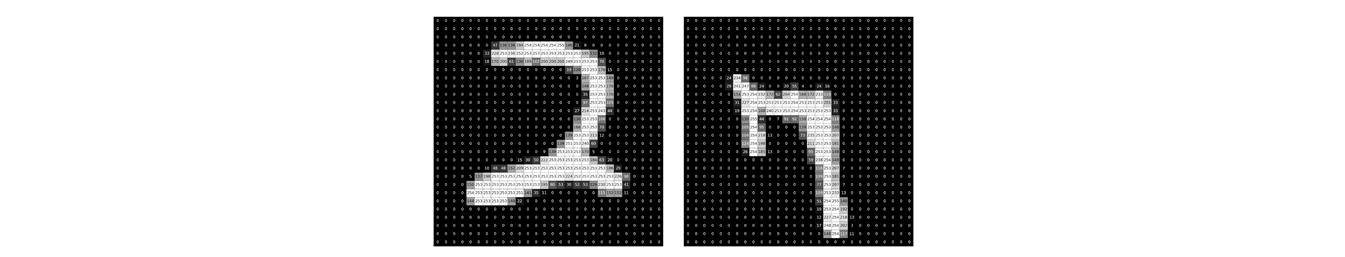  
!!!


!!! tip Exécuter une cellule  
Pour commencer, cliquez dans la cellule de code ci-dessous puis appuyez sur le bouton <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">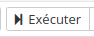</span> ou les touches <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>.  
Lorsque le code aura été exécuté, un nombre apparaîtra entre les crochets sur la gauche : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>  
!!!


??? warning SOS : Rien ne se passe ? Cliquez ici  

### Rien ne se passe quand vous exécutez une cellule ?

**Cas 1 : La cellule n'a pas été exécutée.**  
Vous voyez ceci : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">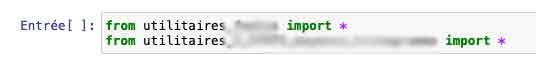</span>

**Solution :** Cliquez dans la cellule (sur le mot `from` par exemple) puis appuyez sur le bouton <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">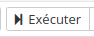</span>

---

**Cas 2 : La cellule est en cours d'exécution**  
Vous voyez ceci : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">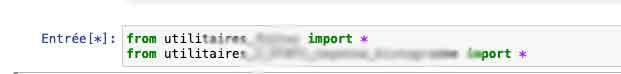</span>

**Solution :** La base de données se charge. Patientez jusqu'à une minute.

---

**Cas 3 : Rien ne fonctionne malgré les solutions ci-dessus**  

**Solution :** Relancez le notebook depuis le début :

1. Cliquez sur le bouton **deux petites flèches** <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">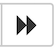</span> dans la barre d'outils en haut du notebook


2. Cliquez ensuite sur le bouton rouge **"Relancer et exécuter toutes les cellules"**
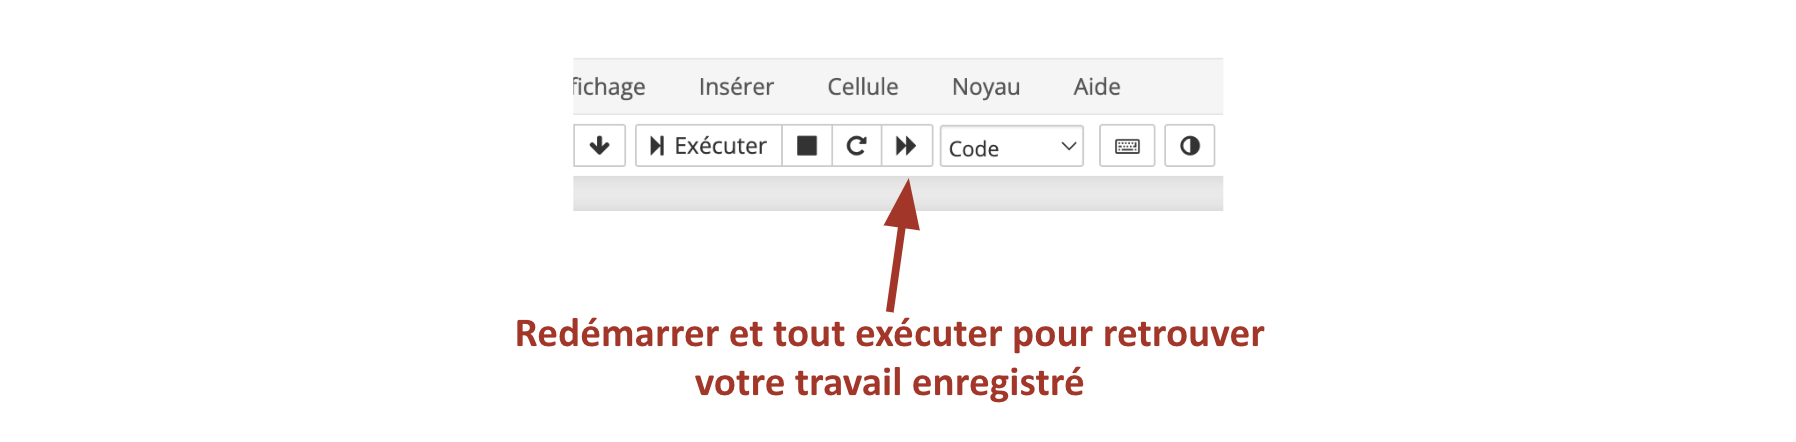  

???


In [ ]:
from utilitaires_mnist import *
from utilitaires_S_STATS_moyenne_histogramme import *

<div id="debut-etape-bdd" style="height: 1px; visibility: hidden;"></div>


!!! tip Base de données  
Nous avons environ 6 000 images.  
**Exécutez la cellule suivante** pour afficher la base de données. Vous pouvez cliquer sur une ligne pour afficher l'image correspondante et vous déplacer avec les flèches haut et bas du clavier.  
!!!


In [ ]:
affichage_banque()

validation_execution()

!!! question 1) Combien d'images de 7 y a-t-il parmi les 10 premières images ?
 **Remplacez les `...`** dans la cellule suivante par votre réponse **puis exécutez**.  
!!!


In [ ]:
nombre_7 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_nombre()

<div id="debut-etape-depart" style="height: 1px; visibility: hidden;"></div>


## A. Algorithme de départ


!!! tip Fonctionnement d'un algorithme  
Un algorithme reçoit une donnée, effectue des opérations, et donne une réponse.  
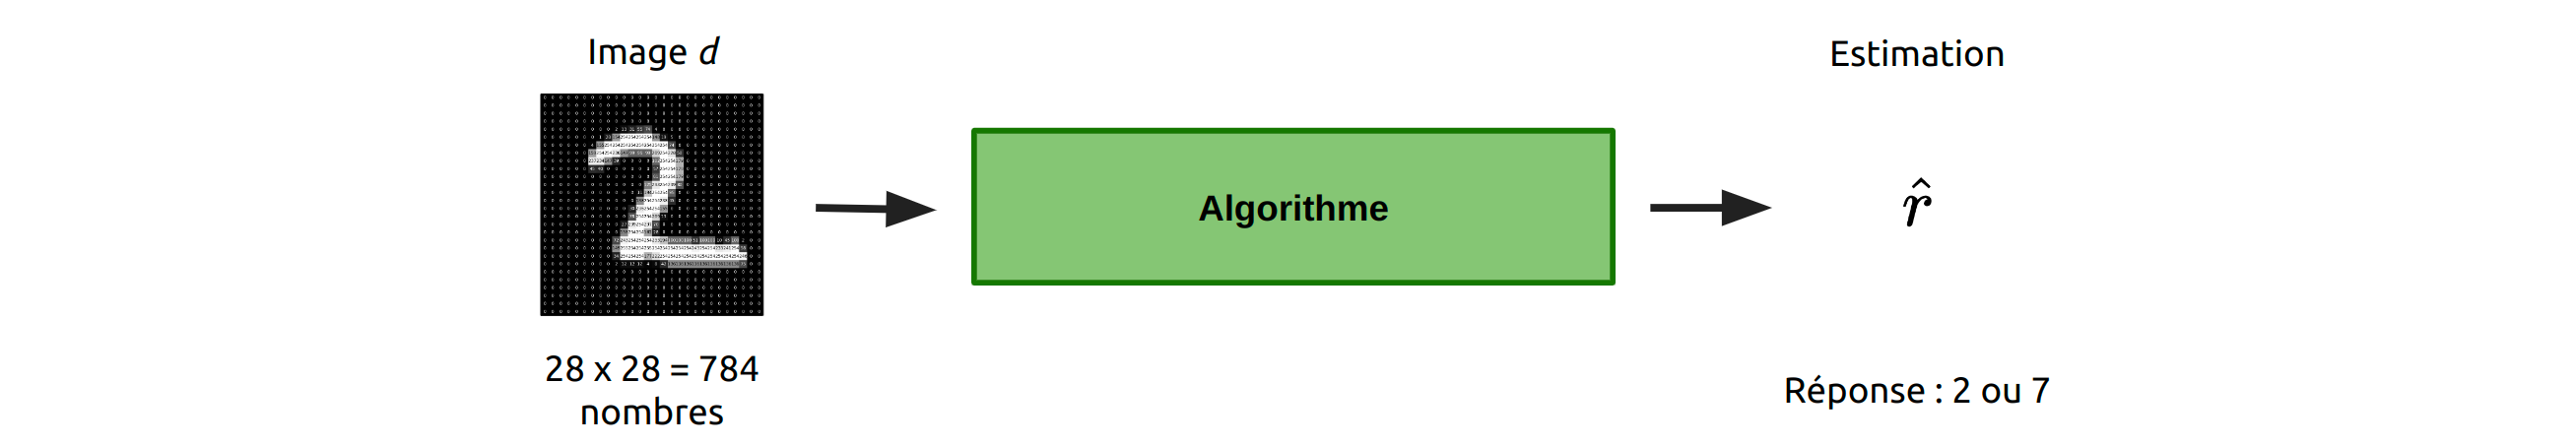  
On peut avoir n'importe quelle stratégie pour déterminer la réponse.
!!!
!!! abstract Algorithme fainéant : Répondre toujours 2.   
LucIA ne veut pas se fatiguer et propose un algorithme très simple **qui répond toujours 2**.  
Cela veut dire que peu importe l'image, l'algorithme ne "réfléchit" pas et dit juste : "Je pense que c'est une image de 2"

Voici le code de cet algorithme très simple ci-dessous. **Exécutez la cellule pour passer à la suite**.
!!!


In [ ]:
import utilitaires_common

def algorithme(d):
    return 2

validation_execution_algo_fixe()

!!! tip Testez l'algorithme fainéant
**Exécutez la cellule suivante** pour tester l'algorithme fainéant
!!!


In [ ]:
test_algorithme_faineant()

validation_execution_test_algorithme_faineant()

!!! question 2) Que répond l'algorithme fainéant pour ces trois images ?
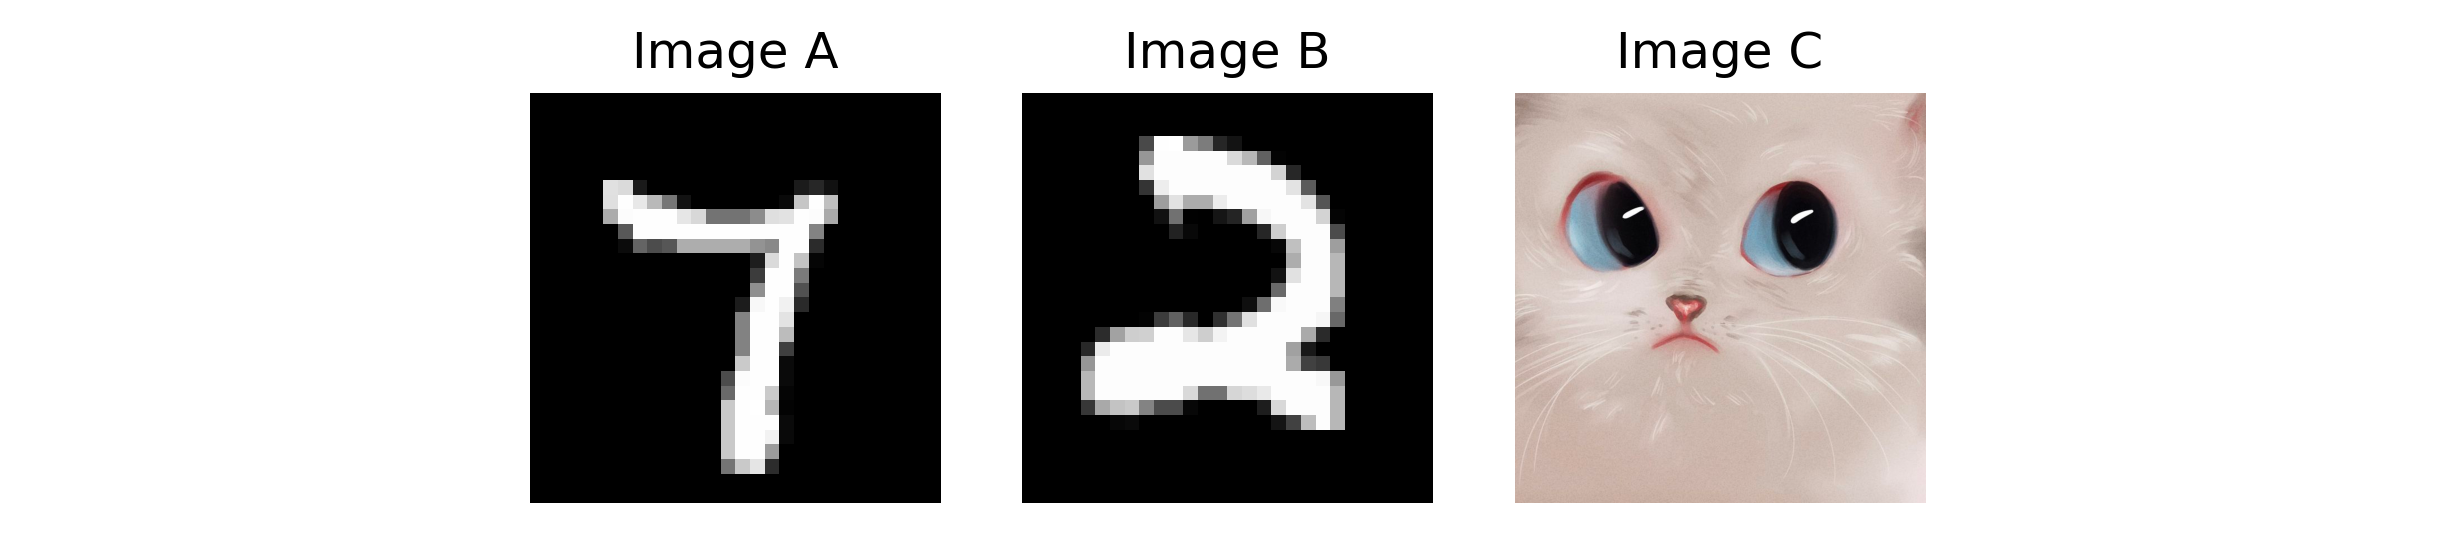  
**Remplacez les `...`** dans la cellule suivante par votre réponse  **puis exécutez**.  
!!!


In [ ]:
Reponse_Donnee_A = ...
Reponse_Donnee_B = ...
Reponse_Donnee_C = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_faineant()

### Le taux d'erreur


!!! info Le pourcentage d'erreur : un moyen d'évaluer votre algorithme  
Voici la formule donnant la proportion d'erreur :  
$$\text{erreur} = \frac{\text{Nombre d'images mal classées}} {\text{Nombre total d'images}}$$  
Plus la proportion d'erreur de votre algorithme est basse meilleure est votre solution.  
Une image mal classée est une image pour laquelle l'algorithme a donné une estimation $\hat r$  différente de la vraie classe $r$ de l'image:  
$$\hat r \neq r.$$  

Remarque :   
Une proportion peut s'écrire en pourcentage en multipliant par $100\%$.  
Par exemple, si l'algorithme fait 4 erreurs sur 20 images : $$\text{erreur} = \frac{4}{20}=0,2=0,2\times100\% = 20\%.$$  
!!!


In [ ]:
affichage_banque(showPredictions=True)

validation_execution_calcul_score()

!!! question 3) Quel est le pourcentage d'erreur de l'algorithme sur les 10 premières images ?
Calculez le pourcentage d'erreur de l'algorithme sur les 10 premières images.  
**Remplacez les `...`** dans la cellule suivante par votre réponse (uniquement le nombre sans le %) **puis exécutez**.  
!!!


In [ ]:
erreur_10 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_fixe()

!!! tip Taux d'erreur sur toutes les images  
**Exécutez la cellule suivante** pour calculer le pourcentage d'erreur sur l'ensemble des 6 000 images.  
!!!


In [ ]:
calculer_score_etape_1(animation=False)

<div id="debut-etape-data" style="height: 1px; visibility: hidden;"></div>


## B. La donnée pour l'ordinateur : L'image numérique


!!! abstract Qu'est-ce qu'une image ?  
Pour diminuer notre erreur, notre algorithme doit "regarder" l'image. On doit comprendre ce qu'est l'image pour l'ordinateur.  
!!!
!!! tip Calcul sur l'image  
Pour l'ordinateur, une image est un tableau de nombres. Chaque nombre correspond à un pixel de l'image. Chaque pixel vaut entre 0 et 255, 0 pour noir et 255 pour blanc.  
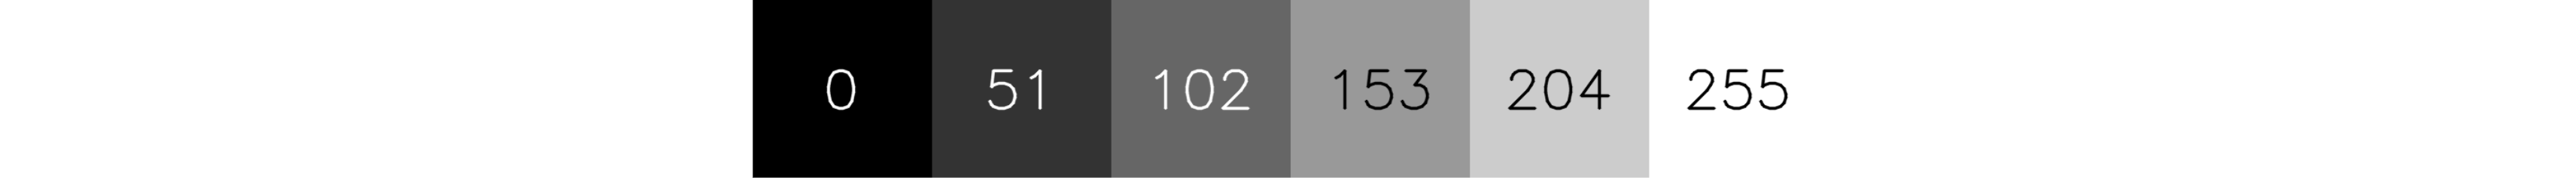  
**Exécutez la cellule suivante pour voir un exemple.**  
!!!


In [ ]:
question_pixel()

!!! tip Visualisation des pixels de l'image  
**Exécutez la cellule suivante** pour voir une image complète avec les valeurs de ses pixels.
!!!


In [ ]:
affichage_image_et_pixels()

validation_execution_affichage()

!!! question 4) Combien y a-t-il de pixels sur cette image ?
**Remplacez les `...`** dans la cellule suivante par le nombre de pixels sur l'image ci-dessus.
!!!


In [ ]:
nb_pixels = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_nb_pixels()

<div id="debut-etape-carac" style="height: 1px; visibility: hidden;"></div>


## C. Calcul d'une caractéristique


!!! info Caractéristique d'une image  
Pour diminuer notre erreur, notre algorithme doit maintenant utiliser l'image au lieu de répondre au hasard.  
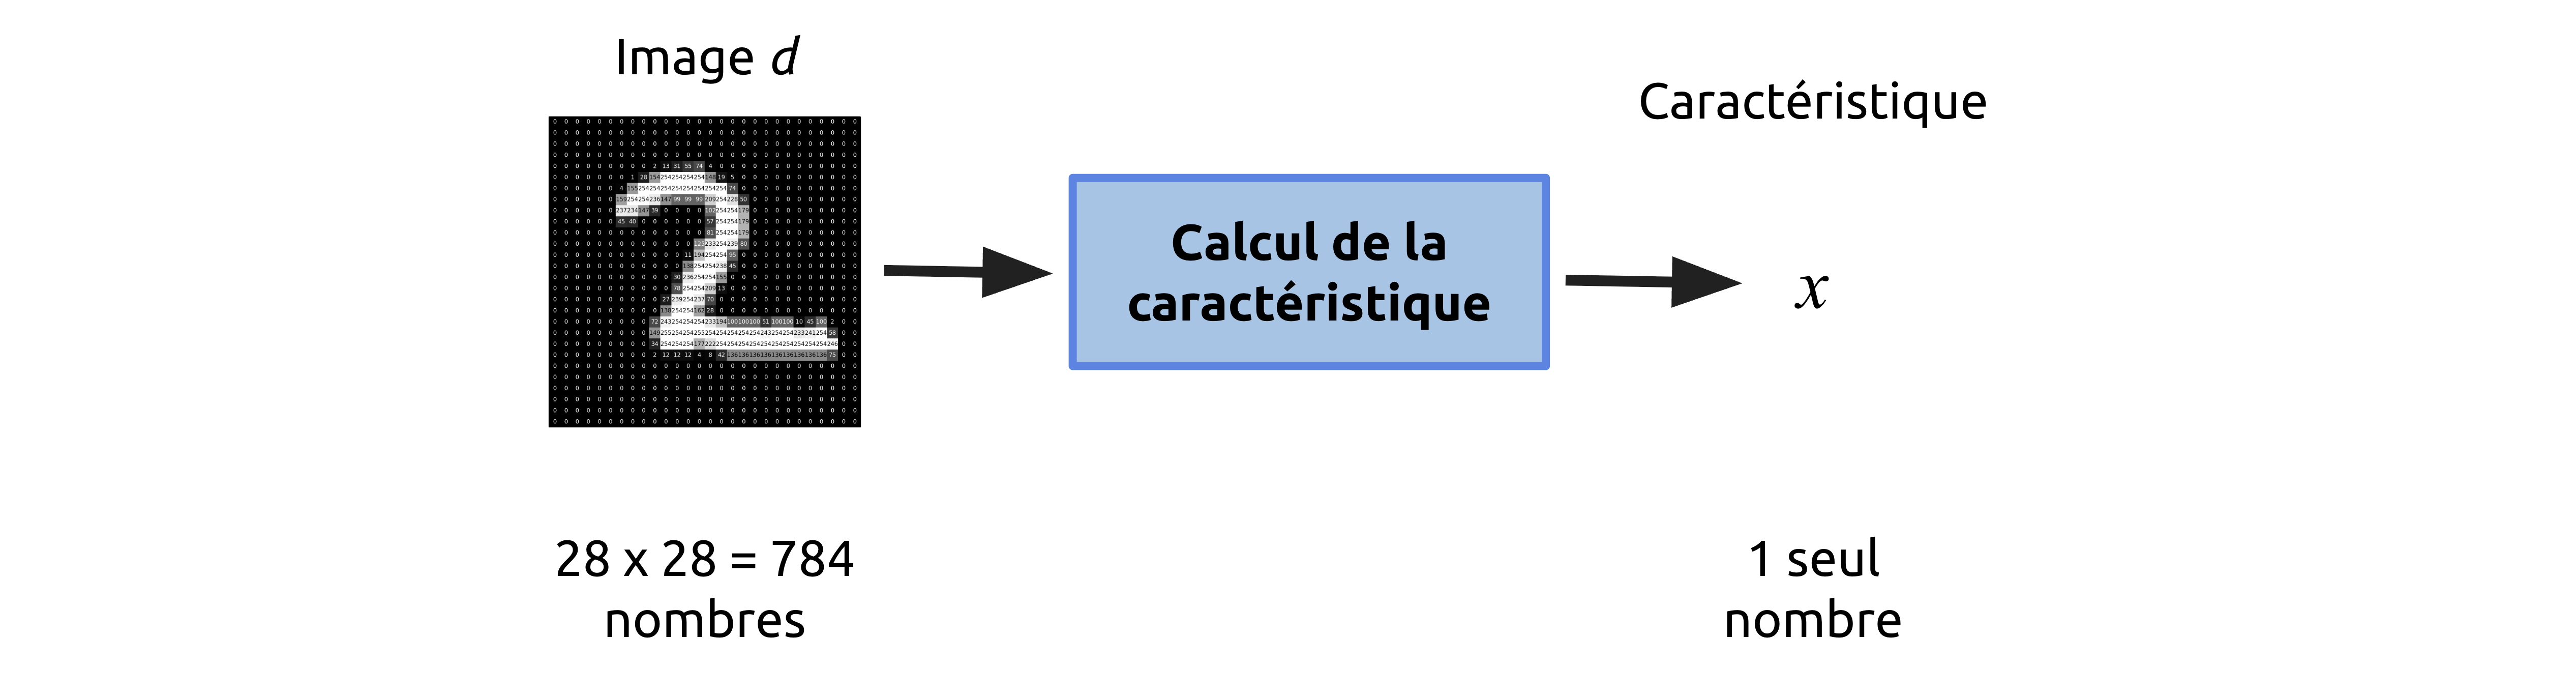  
La caractéristique notée $x$ permet de résumer l'image en une seule information.  
!!!


!!! tip Caractéristique : moyenne de l'image entière  
Nous allons prendre comme caractéristique la moyenne de l'image c'est à dire la moyenne des valeurs de **tous** ses pixels.  
!!!

!!! tip Exemple sur des plus petites images
Voyons d'abord un exemple sur une image 3x3 donc avec 9 pixels.  
**Exécutez la cellule suivante** pour afficher une image 3x3.
!!!


In [ ]:
afficher_image_3x3()

validation_execution_afficher_image_3x3()

!!! question 5) Quelle est la caractéristique de cette image ?
**Remplacez les `...`** dans la cellule suivante par la caractéristique $x$ de l'image ci-dessus, c'est à dire la moyenne des valeurs de tous ses pixels.
!!!


In [ ]:
x = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_moyenne_3x3()

In [ ]:
# EXECUTEZ CETTE CELLULE
qcm_carac_moyenne()

In [ ]:
# Exécutez cette cellule
qcm_caracteristique()

<div id="debut-etape-classif" style="height: 1px; visibility: hidden;"></div>


## D. Classificateur


!!! tip Utiliser la caractéristique pour classer les images
La caractéristique va nous permettre d'estimer si l'image est une image de 2 ou une image de 7.  
**Exécutez la cellule suivante** pour afficher les images et leur caractéristique
!!!


In [ ]:
affichage_banque(carac=1)
exercice_droite_carac()

validation_execution_affichage_classif()

!!! question 6) Placer les 10 premières images sur une droite
Cliquez sur la droite pour placer les images avec leur caractéristique en abscisse. Vous pourrez exécuter la cellule suivante quand vous aurez placé correctement les 10 premières images (dans l'ordre).  
!!!


In [ ]:
validation_exercice_droite_carac()

!!! question 7) La caractéristique est-elle plus élevée pour les images de 2 ou pour les images de 7 ?
Regardez les points sur la droite et indiquez dans la cellule suivante quelle classe (2 ou 7) a souvent une plus petite caractéristique que l'autre et inversement.  
!!!


In [ ]:
r_petite_caracteristique = ...
r_grande_caracteristique = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_ordre_caracteristique()

!!! question 8) Et maintenant, à partir de quelle valeur on décide que c'est une image de 2 ?
Regardez à nouveau la droite et choisissez une valeur dite **seuil** $t$ pour séparer les images de 2 et les images de 7  
!!!


In [ ]:
# Remplacez les ... avec la valeur que vous avez choisie
t = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_seuil()

!!! info Résumé : la classification  
La classification est donc la dernière étape de l'algorithme. On répond 2 ou 7 en fonction de la caractéristique $x$.  
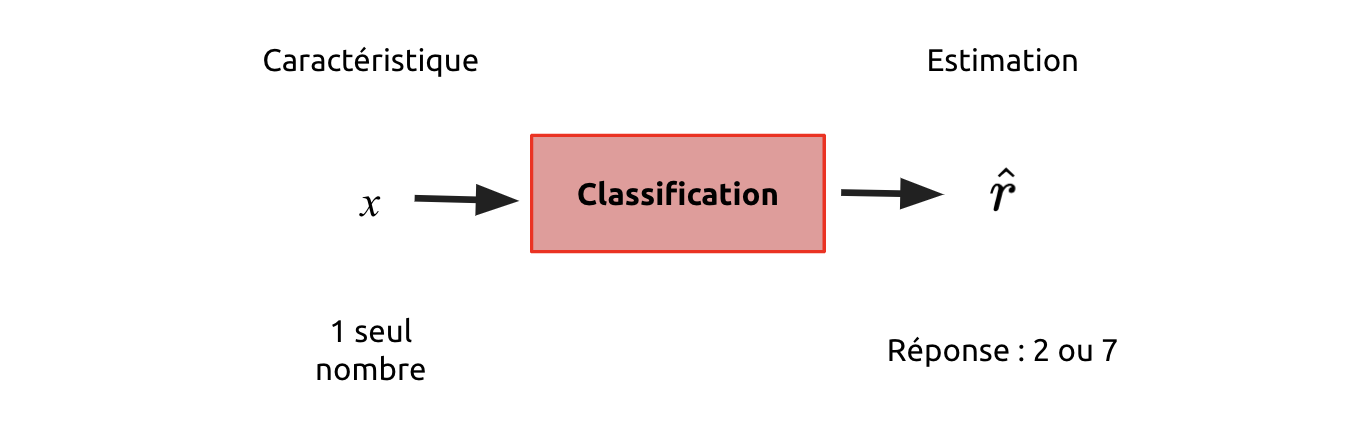  
**On compare $x$ à un seuil $t$** à définir : $\hat{r} = \left\{ \begin{array}{ll} 2 & \mbox{si $x \leq t$} \\ 7 & \mbox{si $x > t$} \end{array} \right.$ (ou l'inverse selon les cas).  

Voici la fonction ci-dessous. **Exécutez la cellule** pour passer à la suite
!!!


In [ ]:
# Fonction répondant au problème en fonction de la caractéristique x de la donnée que l'on doit classer
def classification(x, t):
    # Comparaison de la caractéristique au seuil t
    if x <= t:
        return 7
    else:
        return 2
    
validation_execution_classif()

!!! abstract Notre algorithme est complet !  
En mettant bout à bout les étapes précédentes, nous pouvons construire un algorithme complet :  
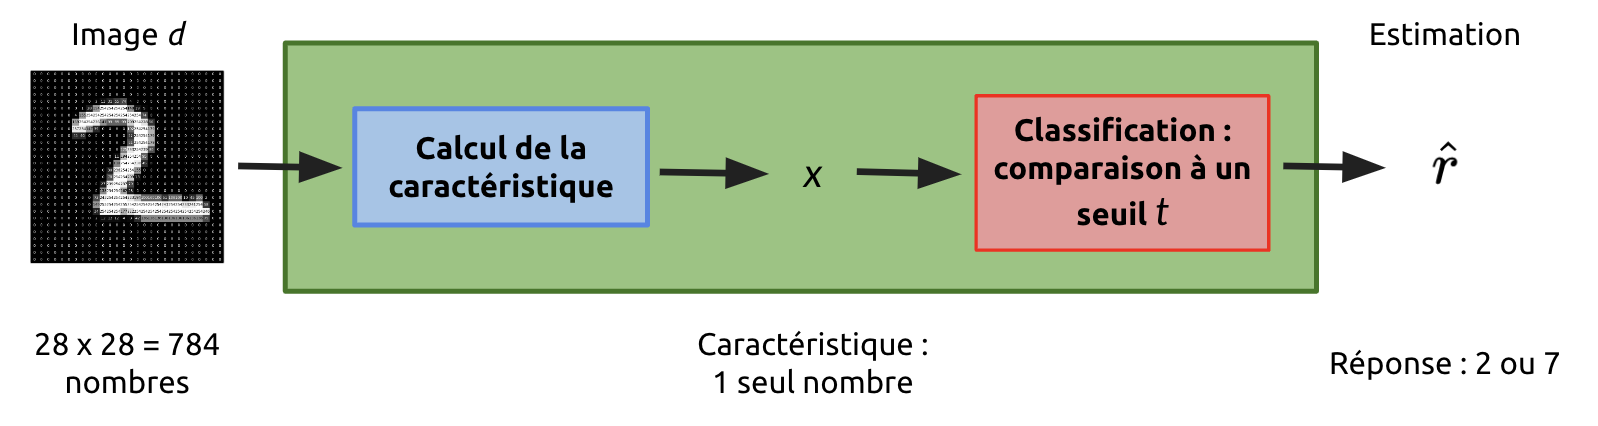  
Pour prédire si une image est une image de 2 ou une image de 7, l'algorithme calcule la caractéristique $x$ de l'image et compare cette caractéristique à un seuil $t$.  
Si la caractéristique est inférieure à $t$, l'algorithme prédit 7, sinon il prédit 2.  
!!!

!!! tip Testez cet algortihme
**Exécutez la cellule suivante** pour afficher l'interface de test de votre algorithme. Essayez de dessiner des images plus ou moins grosses pour voir comment elles sont classées.
!!!


In [ ]:
test_algorithme_ref()

validation_execution_test_algorithme_ref()

## E. Calcul de l'erreur d'entraînement pour ce paramètre


!!! tip Exécutez la cellule suivante  
Exécutez la cellule suivante pour revoir les 10 premières images que vous avez placé sur la droite.  
!!!


In [ ]:
affichage_10_droite()

validation_execution_affichage_10_droite()

!!! question 9) Quel est votre pourcentage d'erreur sur les 10 premières images ?
Avec le seuil que tu as choisi, combien d'erreurs l'algorithme a-t-il fait sur les 10 premières images ? (voir le graph ci-dessus). En déduire le pourcentage d'erreur à compléter dans la cellule suivante.  
!!!


In [ ]:
erreur_10 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_seuil()

!!! tip Calculez votre erreur sur tout l'ensemble d'entraînement  
Exécutez la cellule suivante pour calculer votre pourcentage d'erreur avec la caractéristique et le seuil que vous avez choisi  
!!!


In [ ]:
calculer_score_carac()

!!! abstract Améliorations  
Nous allons voir dans les prochaines étapes les différentes possibilités pour diminuer votre pourcentage d'erreur.  
!!!


## F. Analyse statistique pour optimiser le seuil $t$


!!! info Histogramme et répartition des valeurs de la caractéristique  
Pour trouver le meilleur seuil $t$, on peut analyser les valeurs de la caractéristique $x$ pour les images de 2 et les images de 7.  
**Exécutez la cellule suivante** pour comment construire cet histogramme.  
!!!


In [ ]:
generer_histogramme_classif()

!!! tip Animation  
**Exécutez la cellule suivante** pour construire l'histogramme complet 
!!!


In [ ]:
animation_histogramme()

validation_execution_animation_histogramme()

!!! tip Histogramme complet  
**Exécutez la cellule suivante** pour réafficher l'histogramme complet en grand.  
L'histogramme indique le nombre d'images par classe pour chaque valeur de la caractéristique.  
!!!


In [ ]:
afficher_histogramme()

validation_execution_afficher_histogramme()

!!! question 10) Quel histogramme correspond à quelle classe ?
Regardez les deux histogrammes et indiquez dans la cellule suivante lequel correspond aux images de 2 et lequel correspond aux images de 7.  
!!!


In [ ]:
r_histogramme_orange = ...
r_histogramme_bleu = ...

validation_question_hist_1()

!!! question 11) Lecture des histogrammes
Combien y-a-t-il d'images de 2 qui ont une caractéristique entre 20 et 22 ?  
Et pour les images de 7 ?  
!!!


In [ ]:
# Remplacez les ... par la valeur de votre réponse

nombre_2 = ...

nombre_7 = ...

validation_question_hist_2()

!!! question 12) Histogrammes et erreur
Combien y-a-t-il d'images de 2 dont la caractéristique est inférieure strictement à 16 ?  
Et pour les images de 7 ?  
!!!


In [ ]:
# Remplacez les ... par la valeur de votre réponse

nombre_2_inf_16 = ...

nombre_7_inf_16 = ...

validation_question_hist_3()

!!! abstract Choix du seuil avec les histogrammes  
Grâce à l'histogramme, on peut choisir un seuil $t$ qui sépare les valeurs de $x$ des images de 2 et des images de 7.  
**Exécutez la cellule suivante** pour réafficher l'histogramme.  
!!!


In [ ]:
afficher_histogramme(legend=True)

validation_execution_reafficher_histogramme()

!!! question 13) Choisissez un seuil $t$.
Regardez l'histogramme et choisissez le meilleur seuil $t$ pour classer les images de 2 et les images de 7.  
Remplacer les `...` dans la cellule suivante avec votre réponse.  
!!!


In [ ]:
t = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_hist_seuil()

!!! tip Calculez votre nouvelle erreur  
**Exécutez la cellule ci-dessous** pour calculer votre nouveau taux d'erreur, cette fois avec la valeur de $t$ optimale  
!!!


In [ ]:
calculer_score_hist_seuil()

<div id="debut-etape-custom" style="height: 1px; visibility: hidden;"></div>


# Amélioration de la caractéristique : faites mieux !


!!! abstract Comment faire mieux ?  
En optimisant le seuil, vous avez pu obtenir l'erreur la plus basse possible **en utilisant comme caractéristique la moyenne de tous les pixels de l'image.**  
Le seul moyen pour réduire encore le taux d'erreur est maintenant de trouver une meilleure caractéristique !  
!!!


## G. Moyenne sur une partie de l'image



!!! info Utiliser la moyenne plus intelligemment  
Une première piste pour améliorer votre caractéristique : utiliser la moyenne seulement sur une zone de l'image qui vous parait intéressante pour distinguer les 2 et les 7.  
!!!


!!! question 14) Choisissez la zone de l'image sur laquelle vous allez calculer la moyenne
**Exécutez la cellule suivante** puis sélectionnez avec la souris un rectangle sur une des images. La caractéristique sera la moyenne des pixels dans ce rectangle.  
!!!  
!!! info Conseil  
N'oubliez pas que la caractéristique doit être la plus différente possible selon que l'image soit un 2 ou 7. Regardez les images pour trouver une zone qui diffère le plus entre les deux chiffres.  
!!!


In [ ]:
afficher_customisation()

validation_execution_afficher_customisation()

!!! question 15) Choisissez les paramètres de classification
1. À partir des histogrammes, indiquez dans la cellule suivante quelle classe (2 ou 7) a souvent une plus petite caractéristique que l'autre et inversement.  
2. À partir des histogrammes, choisissez un seuil $t$ pour séparer les images de 2 et les images de 7. Essayez d'obtenir l'erreur la plus basse possible !  
!!!


In [ ]:
r_petite_caracteristique = ...
r_grande_caracteristique = ...

t = ...

# NE PAS TOUCHER APRES CETTE LIGNE
calculer_score_custom()

!!! abstract Fin du Notebook  
Dans ce notebook, vous avez :  
  
- Fait des opérations numériques sur des images  
- Définit des caractéristiques pour passer de l'image à un seul nombre  
- Fait une classification par seuil pour utiliser cette caractéristique afin de répondre à la question  
- Optimisé le seuil $t$ pour minimiser votre erreur avec chaque caractéristique testée  
  
S'il vous reste du temps, vous pouvez continuer à tester des caractéristiques en répétant les étapes précédentes à partir de la définition de la fonction caractéristique  
!!!


## H. Bravo tu as découvert la classification avec une caractéristique.
## Dans la suite nous te proposons d'essayer de coder des caractéristiques ou d'inventer la tienne. Cette fin est un bonus de niveau difficile voire très difficile. 


!!! question 16) Moyenne de plusieurs lignes
Modifiez directement la fonction `caracteristique` pour que la moyenne des pixels des lignes 12 et 14 soit calculé. Actuellement cette fonction calcule la moyenne des lignes 3 et 4.   
 L'image est stockée dans d.  
 La fonction doit renvoyer une seule valeur.  
!!!


In [ ]:
def caracteristique(d):
    # Sélection de la ligne 3 et 4 
    ligne1 = d[2,:]
    ligne2 = d[3,:]
    # Calcul de la somme des pixels de cette ligne
    somme_pixels = 0
    nombre_pixels = 0
    for pixel in ligne1:
            somme_pixels += pixel
            nombre_pixels += 1
    for pixel in ligne2:
            somme_pixels += pixel
            nombre_pixels += 1
    # Calcul de la moyenne
    moyenne_des_pixels = somme_pixels / nombre_pixels

    return moyenne_des_pixels


# NE PAS TOUCHER APRES CETTE LIGNE
validation_caracteristique_ligne_et_affichage()

!!! question 17) Choisissez les paramètres de classification
1. À partir des histogrammes, indiquez dans la cellule suivante quelle classe (2 ou 7) a souvent une plus petite caractéristique que l'autre et inversement.  
2. À partir des histogrammes, choisissez un seuil $t$ pour séparer les 2 et les 7. Essayez d'obtenir l'erreur la plus basse possible !  
!!!


In [ ]:
r_petite_caracteristique = ...
r_grande_caracteristique = ...

t = ...

# NE PAS TOUCHER APRES CETTE LIGNE
calculer_score_code_moyenne_ligne()

## I. Proposition libre
!!! question 18) Inventez votre propre caractéristique
Complétez directement la fonction `caracteristique` dans la cellule suivante avec votre idée. La fonction doit renvoyer une seule valeur.  
La suite peut être difficile si vous n'avez pas de connaissance en Python. Bravo d'être arrivé jusque là !   
!!!
!!! tip Exemple  
Vous pouvez essayer de coder une fonction  qui renvoie :   
- la moyenne d'autres lignes plus pertinentes  
- la moyenne d'une ou plusieurs colonnes  
- la moyenne de plusieurs zones  
- le nombre de pixel supérieur à 100 dans la zone centrale.  
!!!


In [ ]:
def caracteristique(d):
    # Ajouter votre code ici
    
    
    
    return ...


# NE PAS TOUCHER APRES CETTE LIGNE
validation_caracteristique_libre_et_affichage()

!!! question 19) Choisissez les paramètres de classification
1. À partir des histogrammes, indiquez dans la cellule suivante quelle classe (2 ou 7) a souvent une plus petite caractéristique que l'autre et inversement.  
2. À partir des histogrammes, choisissez un seuil $t$ pour séparer les images de 2 et les images de 7. Essayez d'obtenir l'erreur la plus basse possible !  
!!!


In [ ]:
r_petite_caracteristique = ...
r_grande_caracteristique = ...

t = ...

# NE PAS TOUCHER APRES CETTE LIGNE
calculer_score_code_free()